# Lovely Tensors

> After all, you are only human.

## Install

```sh
pip install lovely-tensors
```

## How to use

In [ ]:
# |hide
import torch
from PIL import Image

In [ ]:
# |hide
torch.set_printoptions(linewidth=120)

In [ ]:
# |hide
# Don't depend on torchvision
# numbers = VF.normalize(VF.center_crop(VF.to_tensor(Image.open("tenchman.jpg")), 196), **in_stats)
numbers = torch.load("mysteryman.pt")

How often do you find yourself debugging PyTorch code? You dump a tensor to the cell output, and see this:

In [ ]:
numbers

tensor([[[-0.3541, -0.3369, -0.4054,  ..., -0.5596, -0.4739,  2.2489],
         [-0.4054, -0.4226, -0.4911,  ..., -0.9192, -0.8507,  2.1633],
         [-0.4739, -0.4739, -0.5424,  ..., -1.0390, -1.0390,  2.1975],
         ...,
         [-0.9020, -0.8335, -0.9363,  ..., -1.4672, -1.2959,  2.2318],
         [-0.8507, -0.7822, -0.9363,  ..., -1.6042, -1.5014,  2.1804],
         [-0.8335, -0.8164, -0.9705,  ..., -1.6555, -1.5528,  2.1119]],

        [[-0.1975, -0.1975, -0.3025,  ..., -0.4776, -0.3725,  2.4111],
         [-0.2500, -0.2325, -0.3375,  ..., -0.7052, -0.6702,  2.3585],
         [-0.3025, -0.2850, -0.3901,  ..., -0.7402, -0.8102,  2.3761],
         ...,
         [-0.4251, -0.2325, -0.3725,  ..., -1.0903, -1.0203,  2.4286],
         [-0.3901, -0.2325, -0.4251,  ..., -1.2304, -1.2304,  2.4111],
         [-0.4076, -0.2850, -0.4776,  ..., -1.2829, -1.2829,  2.3410]],

        [[-0.6715, -0.9853, -0.8807,  ..., -0.9678, -0.6890,  2.3960],
         [-0.7238, -1.0724, -0.9678,  ..., -1

Was it really useful?

What is the shape?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
import lovely_tensors as lt

In [ ]:
lt.monkey_patch()

## `__repr__()`

In [ ]:
# A very short tensor - no min/max
numbers.flatten()[:2]

tensor[2] μ=-0.345 σ=0.012 [-0.354, -0.337]

In [ ]:
# A slightly longer one
numbers.flatten()[:6].view(2,3)

tensor[2, 3] n=6 x∈[-0.440, -0.337] μ=-0.388 σ=0.038 [[-0.354, -0.337, -0.405], [-0.440, -0.388, -0.405]]

In [ ]:
# Too long to show the values
numbers

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073

In [ ]:
spicy = numbers.flatten()[:12].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!

In [ ]:
# A zero tensor
torch.zeros(10, 10)

tensor[10, 10] n=100 all_zeros

In [ ]:
spicy.verbose

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!
[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
spicy.plain

[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

## Going `.deeper`

In [ ]:
numbers.deeper

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
# You can go deeper if you need to
dt = torch.randn(3, 3, 5)
dt.deeper(2)

tensor[3, 3, 5] n=45 x∈[-2.407, 1.648] μ=-0.082 σ=1.054
  tensor[3, 5] n=15 x∈[-2.391, 1.421] μ=-0.317 σ=1.225
    tensor[5] x∈[-1.590, 1.421] μ=0.375 σ=1.186 [0.784, -1.590, 1.421, 0.200, 1.060]
    tensor[5] x∈[-2.200, 0.503] μ=-0.537 σ=1.005 [-2.200, -0.385, -0.135, 0.503, -0.470]
    tensor[5] x∈[-2.391, 1.379] μ=-0.788 σ=1.378 [-1.016, -2.391, -0.626, -1.288, 1.379]
  tensor[3, 5] n=15 x∈[-2.407, 1.156] μ=0.038 σ=0.894
    tensor[5] x∈[-0.049, 1.156] μ=0.577 σ=0.525 [0.172, 0.567, 1.156, -0.049, 1.037]
    tensor[5] x∈[-2.407, 0.545] μ=-0.402 σ=1.172 [0.154, 0.115, 0.545, -2.407, -0.416]
    tensor[5] x∈[-1.109, 0.912] μ=-0.062 σ=0.730 [0.198, -0.184, -1.109, -0.126, 0.912]
  tensor[3, 5] n=15 x∈[-1.478, 1.648] μ=0.032 σ=1.052
    tensor[5] x∈[-1.478, 1.512] μ=-0.138 σ=1.188 [-1.009, -1.478, -0.181, 0.467, 1.512]
    tensor[5] x∈[-1.213, 1.414] μ=-0.444 σ=1.078 [-1.180, 1.414, -0.585, -1.213, -0.656]
    tensor[5] x∈[0.019, 1.648] μ=0.679 σ=0.675 [0.056, 1.648, 0.915, 0.758, 0.019

## Now in `.rgb` colour

The important queston - is it our man?

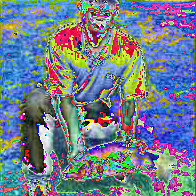

In [ ]:
numbers.rgb

_Maaaaybe?_ Looks like someone normalized him.

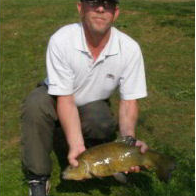

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std
numbers.rgb(in_stats)

It's indeed our hero, the Tenchman!

## `.plt` the statistics

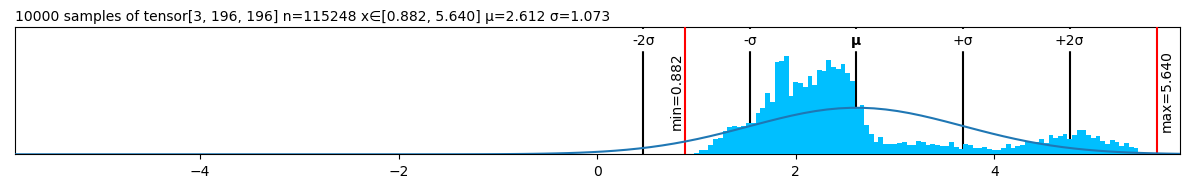

In [ ]:
(numbers+3).plt

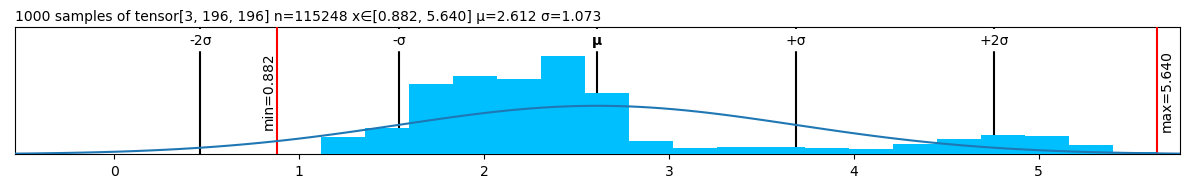

In [ ]:
(numbers+3).plt(center="mean", max_s=1000)

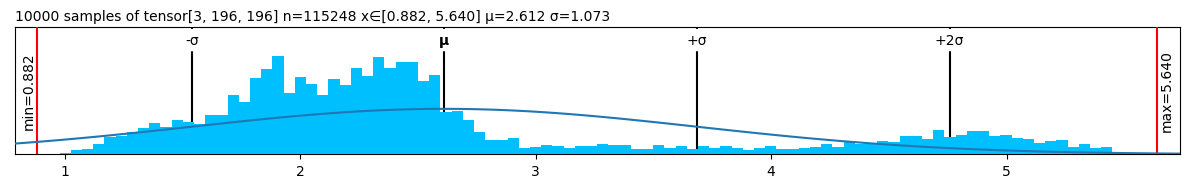

In [ ]:
(numbers+3).plt(center="range")

## Without `.monkey_patch`

In [ ]:
lt.lovely(spicy)

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!

In [ ]:
lt.lovely(spicy, verbose=True)

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!
[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
lt.lovely(numbers, depth=1)

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

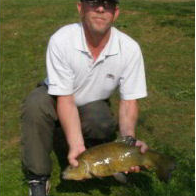

In [ ]:
lt.rgb(numbers, in_stats)

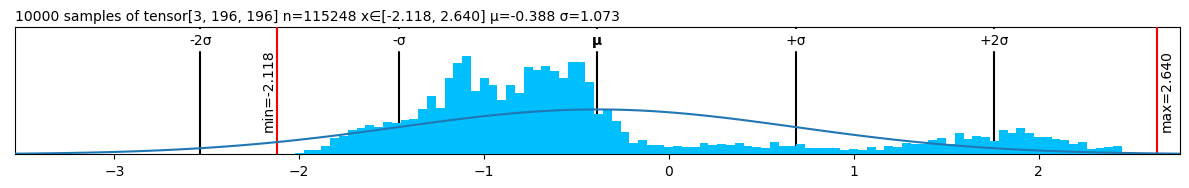

In [ ]:
lt.plot(numbers, center="mean")